https://www.kaggle.com/varshapandey/assignment-data

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,6
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, col, datediff, lit
spark = SparkSession.builder.master("local").getOrCreate()
from lifelines import KaplanMeierFitter

In [42]:
sdf = spark.read.csv('data/assignment-data/Assignment- Membership woes.csv', header=True)

In [43]:
sdf.limit(5).toPandas()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125,M,M,25200000,1,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,None
1,A00002,38,112220,M,M,10339200,1,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,None
2,A00003,12,100000,M,M,14400000,1,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,None
3,A00004,12,100000,M,M,9000000,1,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,None
4,A00005,46,100000,M,M,4800000,1,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,None


In [44]:
sdf.count()

10362

In [45]:
sdf.summary().toPandas()

,summary,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,count,10362,10362,10362,7765,9751,8608,10362,10362,10362,10362,10362,10362,10362,10362,3143
1,mean,None,29.39500096506466,178812.16770025206,None,None,1451099.5539033457,1.7110185095454986,None,46.79849449913144,1.4122756224667052,None,714278.8162339543,None,2.0108275117448367E7,2.011390365351575E7
2,stddev,None,22.427711543052915,268874.7095966414,None,None,1.7571744375046708E7,1.4539602826535838,None,13.89708494038188,1.1451360629741296,None,435517.0199958101,None,17196.66369669409,13784.830157863244
3,min,A00001,100,0,D,F,1000008,1,TYPE-A,0,0,ANNUAL,..,CANCELLED,20060914,20070827
4,25%,None,12.0,100000.0,None,None,399996.0,1.0,None,37.0,0.0,None,343344.0,None,2.0091231E7,2.0101219E7
5,50%,None,19.0,118207.81,None,None,549996.0,1.0,None,46.0,1.0,None,687200.0,None,2.0101231E7,2.0111127E7
6,75%,None,37.0,190000.0,None,None,9.99999996E8,2.0,None,57.0,2.0,None,1143955.0,None,2.0121231E7,2.0130125E7
7,max,A10366,99,999999.99,W,M,999999996,NA,TYPE-B,92,3,SINGLE-PREMIUM,99966,INFORCE,20131129,20131125


In [46]:
sdf = (
sdf.withColumn('START_DATE', to_date(col('START_DATE (YYYYMMDD)'), 'yyyyMMdd'))
    .withColumn('END_DATE', to_date(col('END_DATE  (YYYYMMDD)'), 'yyyyMMdd'))
    .withColumn('JOIN_PERIOD', datediff(col('END_DATE'), col('START_DATE')))
    .withColumn('TIME', datediff(to_date(lit('20140101'), 'yyyyMMdd'), col('START_DATE')))
    .withColumn('CENCORED', col('END_DATE  (YYYYMMDD)').isNull())
    .withColumn('CHURNED', col('END_DATE  (YYYYMMDD)').isNotNull())
)

In [47]:
sdf.limit(10).toPandas()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,...,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD),START_DATE,END_DATE,JOIN_PERIOD,TIME,CENCORED,CHURNED
0,A00001,29,113125,M,M,25200000,1,TYPE-B,45,2,...,477,INFORCE,20060914,None,2006-09-14,None,NaN,2666,True,False
1,A00002,38,112220,M,M,10339200,1,TYPE-B,36,3,...,255,INFORCE,20061102,None,2006-11-02,None,NaN,2617,True,False
2,A00003,12,100000,M,M,14400000,1,TYPE-B,42,1,...,7866,INFORCE,20070124,None,2007-01-24,None,NaN,2534,True,False
3,A00004,12,100000,M,M,9000000,1,TYPE-B,39,2,...,200533,INFORCE,20070122,None,2007-01-22,None,NaN,2536,True,False
4,A00005,46,100000,M,M,4800000,1,TYPE-B,27,2,...,6988,INFORCE,20070131,None,2007-01-31,None,NaN,2527,True,False
5,A00006,12,110000,None,None,None,1,TYPE-B,48,3,...,5311,INFORCE,20070215,None,2007-02-15,None,NaN,2512,True,False
6,A00007,36,100000,M,M,24000000,1,TYPE-B,39,2,...,4055,INFORCE,20070221,None,2007-02-21,None,NaN,2506,True,False
7,A00008,12,120000,M,M,3600000,1,TYPE-B,28,1,...,13100,CANCELLED,20070312,20090811,2007-03-12,2009-08-11,883.0,2487,False,True
8,A00009,35,120000,None,None,None,1,TYPE-B,35,2,...,4522,INFORCE,20070316,None,2007-03-16,None,NaN,2483,True,False
9,A00010,33,102700,M,M,14400000,1,TYPE-B,42,2,...,11266,INFORCE,20070330,None,2007-03-30,None,NaN,2469,True,False


In [54]:
sdf.summary().toPandas()

,summary,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD),JOIN_PERIOD,TIME
0,count,10362,10362,10362,7765,9751,8608,10362,10362,10362,10362,10362,10362,10362,10362,3143,3143,10362
1,mean,None,29.39500096506466,178812.16770025206,None,None,1451099.5539033457,1.7110185095454986,None,46.79849449913144,1.4122756224667052,None,714278.8162339543,None,2.0108275117448367E7,2.011390365351575E7,398.217626471524,1007.452325805829
2,stddev,None,22.427711543052915,268874.7095966414,None,None,1.7571744375046708E7,1.4539602826535838,None,13.89708494038188,1.1451360629741296,None,435517.0199958101,None,17196.66369669409,13784.830157863244,207.4949319079931,629.0907115370877
3,min,A00001,100,0,D,F,1000008,1,TYPE-A,0,0,ANNUAL,..,CANCELLED,20060914,20070827,11,33
4,25%,None,12.0,100000.0,None,None,399996.0,1.0,None,37.0,0.0,None,343344.0,None,2.0091231E7,2.0101219E7,242,366
5,50%,None,19.0,118207.81,None,None,549996.0,1.0,None,46.0,1.0,None,687200.0,None,2.0101231E7,2.0111127E7,423,1097
6,75%,None,37.0,190000.0,None,None,9.99999996E8,2.0,None,57.0,2.0,None,1143955.0,None,2.0121231E7,2.0130125E7,425,1462
7,max,A10366,99,999999.99,W,M,999999996,NA,TYPE-B,92,3,SINGLE-PREMIUM,99966,INFORCE,20131129,20131125,1396,2666


In [57]:
sdf.where('CHURNED = true').count()

3143

In [61]:
print('churn rate : {}'.format(sdf.where('CHURNED = true').count() / sdf.count()))

churn rate : 0.3033198224281027


In [49]:
pdf = sdf.toPandas()

In [50]:
kmf = KaplanMeierFitter()

In [51]:
kmf.fit(pdf['TIME'], event_observed=pdf['CHURNED'])

<lifelines.KaplanMeierFitter: fitted with 10362 observations, 7219 censored>

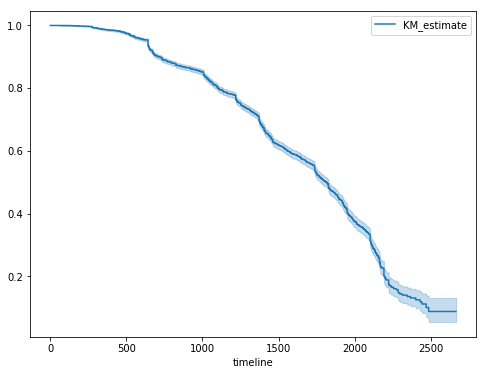

In [52]:
kmf.plot()